In this assignment, we will work on image classification using PyTorch.
• Download the intel image dataset from Kaggle.
• We will use the OpenCV image feature extraction library.
(conda install -c conda-forge opencv)

## 1. [20 pts] Download the dataset, unzip and explore the file folders. Load the image dataset with training and testing grouped. 
import cv2 <br>
IMGSIZE = (128, 128) <br>
CNAMES = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'] <br>
X_tr, y_tr, X_ts, y_ts = [], [], [], [] <br>
for label in labels:<br>
path = _path + '/seg_train/seg_train/' + label <br>
for f in sorted([ for _ in os.listdir(path) if _.lower().endswith('.jpg')]): <br>
X_tr += [cv2.resize(cv2.imread(os.path.join(path,f)), IMGSIZE)] <br>
y_tr += [CNAMES.index(label)] <br><br>

#### Display a few images. How many color channels are there?

In [1]:
import os
import cv2
import torch
import pandas as pd
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
%matplotlib inline
from tqdm import tqdm
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
IMGSIZE = (128,128)
CNAMES = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
X_tr, y_tr, X_ts, y_ts = [], [], [], []
for label in CNAMES:
    path = 'archive/seg_train/seg_train/' + label
    for f in sorted([_ for _ in os.listdir(path) if _.lower().endswith('.jpg')]):
        X_tr += [cv2.resize(cv2.imread(os.path.join(path,f)), IMGSIZE)]
        y_tr += [CNAMES.index(label)]
    path = 'archive/seg_test/seg_test/' + label
    for f in sorted([_ for _ in os.listdir(path) if _.lower().endswith('.jpg')]):
        X_ts += [cv2.resize(cv2.imread(os.path.join(path,f)), IMGSIZE)]
        y_ts += [CNAMES.index(label)]
print(len(X_tr), len(X_ts))

14034 3000


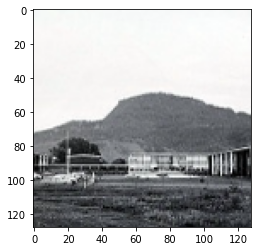

In [3]:
img0 = X_tr[0]
plt.imshow(img0)

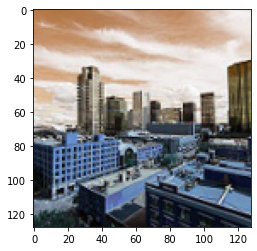

In [4]:
img1 = X_tr[1]
plt.imshow(img1)

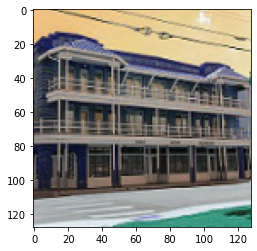

In [5]:
img2 = X_tr[2]
plt.imshow(img2)

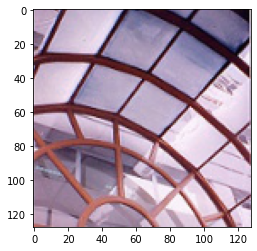

In [6]:
img3 = X_tr[3]
plt.imshow(img3)

In [7]:
print('There are ', np.array(img0).shape[2] , ' color channels')

There are  3  color channels


## 2. [20 pts] Convert the imageset to numpy array, such as the array size: (14034, 128, 128, 3) Scale the imageset to [0-1]

In [8]:
X_tr = np.array(X_tr)
X_ts = np.array(X_ts)
print(X_tr.shape, X_ts.shape)
print(X_tr[0], X_tr[0]/255)
X_trnorm = X_tr / 255
X_tsnorm = X_ts / 255

(14034, 128, 128, 3) (3000, 128, 128, 3)
[[[245 247 247]
  [245 247 247]
  [246 248 248]
  ...
  [248 248 248]
  [246 247 247]
  [245 247 247]]

 [[244 246 246]
  [245 247 247]
  [245 247 247]
  ...
  [248 248 248]
  [246 247 247]
  [245 247 247]]

 [[244 246 246]
  [244 246 246]
  [245 247 247]
  ...
  [248 248 248]
  [246 247 247]
  [245 247 247]]

 ...

 [[ 47  49  50]
  [ 55  57  58]
  [ 65  67  68]
  ...
  [ 58  61  66]
  [ 38  41  46]
  [ 60  63  68]]

 [[ 65  66  67]
  [ 46  48  49]
  [ 67  69  70]
  ...
  [ 33  36  41]
  [ 38  41  47]
  [ 45  48  53]]

 [[ 57  59  60]
  [ 52  54  55]
  [ 68  70  71]
  ...
  [ 29  32  37]
  [ 38  41  46]
  [ 52  55  60]]] [[[0.96078431 0.96862745 0.96862745]
  [0.96078431 0.96862745 0.96862745]
  [0.96470588 0.97254902 0.97254902]
  ...
  [0.97254902 0.97254902 0.97254902]
  [0.96470588 0.96862745 0.96862745]
  [0.96078431 0.96862745 0.96862745]]

 [[0.95686275 0.96470588 0.96470588]
  [0.96078431 0.96862745 0.96862745]
  [0.96078431 0.96862745 

## 3. [50 pts] Create a neural network to train and report its performance on the testing portion of the dataset. 60% reclassification and 55% testing performance should be achievable without any hyperparameter tuning. <br>
(Hint: My model with (50,50,50) layers, which is similar
to the model in module notebook, took around 5 minutes to train 200 epochs.)
Reminder, you have to convert the 3D image (including the color channel) to a linear vector
in case you use fully connected layers at the input, <br> i.e.
_X = torch.flatten(_X, start_dim=1) <br> 
(Hint, for debugging use print statements or PyCharm to display tensor shapes)

For some reason, all my predictions come out as the same. I have tried multiple different eta, layers, epochs. Not sure what the problem is but that is why my accuracy is so low.

In [9]:
X_trflat, X_tsflat = [], []
for index in range(len(X_trnorm)):
    X_trflat.append(X_trnorm[index].flatten())
for index in range(len(X_tsnorm)):
    X_tsflat.append(X_tsnorm[index].flatten())
X_trflat = torch.tensor(X_trflat)
X_tsflat = torch.tensor(X_tsflat)
y_tr = torch.tensor(y_tr)
y_ts = torch.tensor(y_ts)
X_trflat

tensor([[0.9608, 0.9686, 0.9686,  ..., 0.2039, 0.2157, 0.2353],
        [0.7333, 0.4745, 0.2667,  ..., 0.1608, 0.2196, 0.2863],
        [0.9686, 0.7608, 0.5137,  ..., 0.2235, 0.6000, 0.5059],
        ...,
        [0.2863, 0.2667, 0.2745,  ..., 0.5294, 0.5529, 0.5451],
        [0.4078, 0.1294, 0.0078,  ..., 0.0235, 0.0157, 0.0275],
        [0.4745, 0.4392, 0.3725,  ..., 0.5176, 0.5373, 0.5412]],
       dtype=torch.float64)

In [10]:
print(len(X_trflat), len(X_trflat[0]))

14034 49152


In [11]:
print(f'PyTorch version= {torch.__version__}')
print(f'CUDA available= {torch.cuda.is_available()}')
class NN(torch.nn.Module):
    def __init__(self, n_hidden=50, epochs=100, eta=0.1, minibatch_size=50):
        super(NN, self).__init__()
        self.n_hidden = n_hidden
        self.epochs = epochs
        self.eta = eta
        self.minibatch_size = minibatch_size
        self.fc1, self.fc2, self.fc3 = None, None, None
    
    def _forward(self, X, apply_softmax=False):
        assert self.fc1 != None
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        if apply_softmax:
            X = F.softmax(X, dim=1)
        return X
    
    def _reset(self):
        for m in self.modules():
            if isinstance(m, torch.nn.Linear):
                 m.reset_parameters
    
    def predict(self, X):
        assert self.fc1 != None
        print(X.float())
        net_out = self._forward(X.float(), apply_softmax=True)
        p_values, indices = net_out.max(dim=1)
        print(p_values)
        return indices
    
    
    def fit(self, X_train, y_train):
        self._reset() 
        n_output= np.unique(y_train).shape[0] 
        n_features= X_train.shape[1]

        self.fc1 = nn.Linear(n_features, self.n_hidden)  
        self.fc2 = nn.Linear(self.n_hidden, self.n_hidden)
        self.fc3 = nn.Linear(self.n_hidden, n_output)
        
        optimizer = torch.optim.Adam(self.parameters(), lr=self.eta)
        loss_func = nn.CrossEntropyLoss()

        for i in tqdm(range(self.epochs)):
            indices = np.arange(X_train.shape[0])
            
            for start_idx in range(0, indices.shape[0] - self.minibatch_size + 1, self.minibatch_size):
                batch_idx = indices[start_idx:start_idx + self.minibatch_size]
                optimizer.zero_grad()
                
                net_out = self._forward(X_train[batch_idx].float())
                
                loss = loss_func(net_out, y_train[batch_idx])
                loss.backward()
                optimizer.step()

PyTorch version= 1.9.1
CUDA available= False


In [12]:
NN1 = NN()
NN1.fit(X_trflat, y_tr)

100%|██████████| 100/100 [15:08<00:00,  9.08s/it]


In [13]:
predictions = NN1.predict(X_tsflat)

predictions

tensor([[0.7020, 0.4706, 0.3608,  ..., 0.9804, 0.9412, 0.9137],
        [0.8745, 0.7098, 0.4314,  ..., 0.5765, 0.5961, 0.4902],
        [0.9647, 0.9098, 0.8863,  ..., 0.1294, 0.1725, 0.1882],
        ...,
        [0.6196, 0.3137, 0.0549,  ..., 0.0118, 0.0314, 0.0275],
        [0.7333, 0.6118, 0.4902,  ..., 0.3490, 0.3294, 0.3333],
        [0.0078, 0.0078, 0.0196,  ..., 0.0275, 0.0431, 0.0745]])
tensor([0.9782, 0.9782, 0.9782,  ..., 0.9782, 0.9782, 0.9782],
       grad_fn=<MaxBackward0>)


tensor([5, 5, 5,  ..., 5, 5, 5])

In [14]:
for pred in predictions:
    print(pred)

tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)


tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)


tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)


tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)


In [15]:
accuracy_score(y_ts, predictions)

0.167

## 4. [10 pts] Research and find out how to improve the neural network model to solve this problem. Outline an approach.

I beleive the best way to improve this model would be to create a CNN using pytorch. Since we are working with image data, this would most likely improve our accuracy greatly. To do this, I would incorporate convolution layers (Conv2d) and pooling layers (MaxPool2d) into the model. So the model _forward() would be something like: <br>
#### conv1
#### relu
#### maxpool1 <br>

#### conv2
#### relu
#### maxpool2 <br>

#### flatten
#### linear1
#### relu<br>

#### output layer 
#### softmax when needed